# **LA09 / Kelompok 3**
- Aquila Kyne Sudiro 2702212162
- Caroline Ang 2702208606
- Laurel Evelina Widjaja 2702213770
- Liliana Djaja Witama 2702219774

## Problem Description

About Dataset

The dataset selected is the House Rent Dataset obtained from Kaggle. The dataset was created from one of the real estate websites
 in India.
Source: https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset

The housing sector in India is very diverse since it is a massive country, from luxury palaces and modern high-rise apartments to simple village huts. The choice of a comfortable place to live reflects on both the country's economic growth and people's income levels. Despite this progress, India has achieved only 60.9% of its potential to ensure basic rights to housing, according to the Human Rights Measurement Initiative. By renting, the fulfillment of basic rights to housing can be improved. Renting a house/apartment can be done by more people who are not yet able to own their own house.

Hence, from this dataset, we want to look at how those aspects affect rent as well as help landlords deciding their rent price based on their properties' characteristics, since sometimes it might be tricky in deciding one. It will also help tenants in choosing a good property with reasonable price.

Why Is Machine Learning Necessary and How Will It Bring Benefits?

By using Machine Learning, the algorithm will help us in finding main factors in deciding rent prices. It is beneficial because Machine Learning itself offers a wide range of algorithm that are usable, so it is possible to tackle the problems. Most of problems in real life cases aren't linear, so solving problems manually could be tricky at some cases. And this is why Machine Learning comes in handy to lend us a hand.

In this case, modeling will produce an output in the form of rental price predictions that are fair, unbiased, and in accordance with the characteristics of the property.

Description of The Dataset
1. BHK: Number of Bedrooms, Hall, Kitchen.
2. Rent: Rent of the Houses/Apartments/Flats.
3. Size: Size of the Houses/Apartments/Flats in Square Feet.
4. Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)
5. Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.
6. Area Locality: Locality of the Houses/Apartments/Flats.
7. City: City where the Houses/Apartments/Flats are Located.
8. Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
9. Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.
10. Bathroom: Number of Bathrooms.
11. Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.


# Import Libraries

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [94]:
from sklearn.preprocessing import RobustScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import shapiro, pointbiserialr, f_oneway
from sklearn.ensemble import RandomForestRegressor

# EDA

## Import Dataset

In [95]:
df = pd.read_csv("House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


## Information about the dataset

In [96]:
print(df.shape)
df.info()

(4746, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


There are 4746 datas and 12 columns

## Check the missing values

In [97]:
df.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

No missing values in this dataset

## Check duplicated values

In [98]:
df.duplicated().sum()

0

There are no duplicated values in this dataset

## Separate numerical columns and categorical columns

In [99]:
# define the list for categorical and numerical columns
categorical_columns = []
numerical_columns = []

# perform the looping to separate the type of the columns
for i in df.columns:
    #print(str(df[i].dtype))
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        numerical_columns.append(i)
    else:
        categorical_columns.append(i)

#move BHK and Bathroom to categorical_columns to be treated as categorical variables
move = ['BHK', 'Bathroom']
for i in move:
  numerical_columns.remove(i)
  categorical_columns.append(i)

print(f'Categorical: {categorical_columns}')
print(f'Numeric: {numerical_columns}')

Categorical: ['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact', 'BHK', 'Bathroom']
Numeric: ['Rent', 'Size']


Both BHK and Bathroom are considered numerical data, however it is actually binary or categorical data, so we'll remove it from Numerical Data Lists and put it in Categorical Data Lists instead.

## Description of the numerical columns

In [100]:
df[numerical_columns].describe()

,Rent,Size
count,4.746000e+03,4746.000000
mean,3.499345e+04,967.490729
std,7.810641e+04,634.202328
min,1.200000e+03,10.000000
25%,1.000000e+04,550.000000
50%,1.600000e+04,850.000000
75%,3.300000e+04,1200.000000
max,3.500000e+06,8000.000000


## Unique values of categorical variables

In [101]:
for i in categorical_columns:
  print(df[i].value_counts(), '\n')

2022-07-06    311
2022-05-12    149
2022-06-04    135
2022-07-09    126
2022-05-23    125
             ... 
2022-04-24      6
2022-04-25      6
2022-04-26      2
2022-04-13      1
2022-07-11      1
Name: Posted On, Length: 81, dtype: int64 

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64 

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64 

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv 

## Check the distribution and outliers of numerical columns

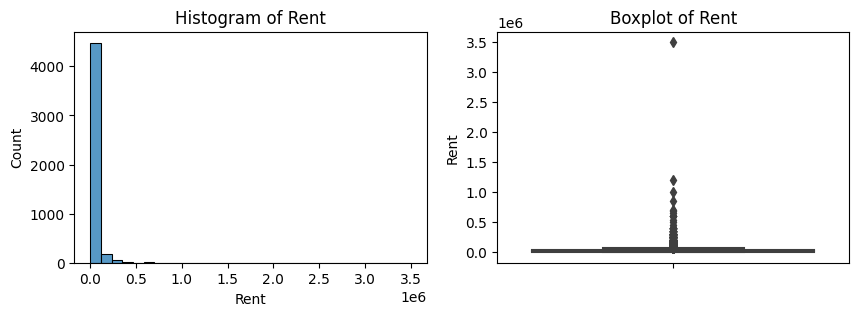

Skewness of Rent: 21.409942283288803
Kurtosis of Rent: 841.1080672214921


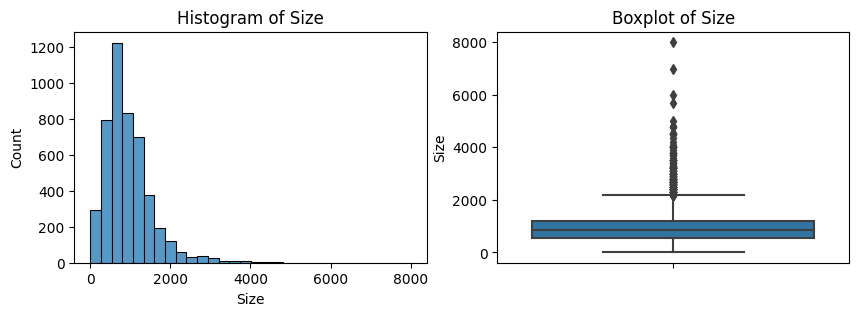

Skewness of Size: 2.2998924373541834
Kurtosis of Size: 11.028080294571417


In [102]:
def check_distribution_outliers(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30)
        plt.title(f'Histogram of {col}')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')

        plt.show()

        print(f'Skewness of {col}:', df[col].skew())
        print(f'Kurtosis of {col}:', df[col].kurt())

check_distribution_outliers(df[numerical_columns], numerical_columns)

The variables are skewed and have outliers. Because the variables Rent and Size are skewed, we want to minimize the skewness (improve normality) by doing the log and sqrt transformations. Log transformation is used on Rent because it is a highly skewed data with large values. Sqrt is applied to Size to reduce skewness less aggressively as Size is moderately skewed.

In [103]:
df['Rent'] = np.log(df['Rent'])
df['Size'] = np.sqrt(df['Size'])

## Check the normality of the distribution

In [104]:
for i in numerical_columns:
    print(i, shapiro(df[i]))

Rent ShapiroResult(statistic=0.9493333697319031, pvalue=1.174630814656632e-37)
Size ShapiroResult(statistic=0.9736836552619934, pvalue=1.0252413613928375e-28)


The data is not normally distributed because the p-value scores are way smaller than 0.05.

## Some visualizations

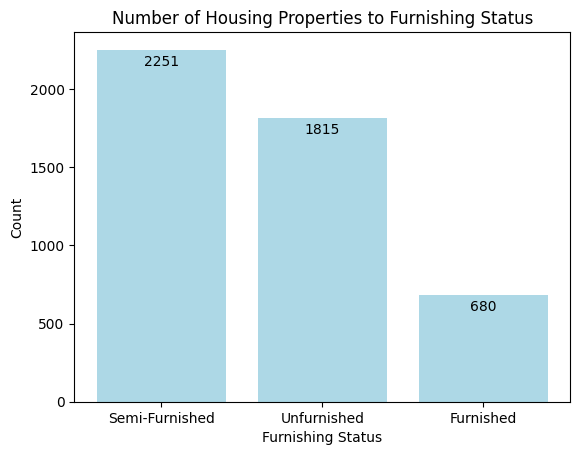

In [105]:
# furnishing status
furnishing_counts = df['Furnishing Status'].value_counts()
plt.bar(furnishing_counts.index, furnishing_counts.values, color='lightblue')

for i, value in enumerate(furnishing_counts):
  plt.text(i, value-100, str(value), color='black', ha='center')

plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.title("Number of Housing Properties to Furnishing Status")
plt.show()


The most common type of furnishing status for properties available to rent is Semi-Furnished

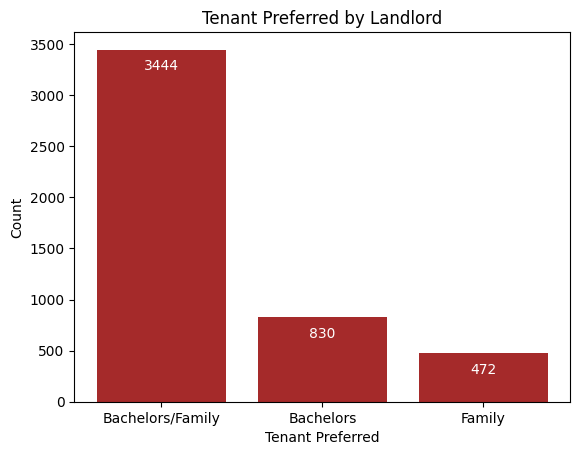

In [106]:
# tenant preference
tenant_counts = df['Tenant Preferred'].value_counts()
plt.bar(tenant_counts.index, tenant_counts.values, color='brown')

for i, value in enumerate(tenant_counts):
  plt.text(i, value-200, str(value), color='white', ha='center')

plt.xlabel('Tenant Preferred')
plt.ylabel('Count')
plt.title('Tenant Preferred by Landlord')
plt.show()

Most landlord don't really pay attention to who'll rent the property, they're open to both bachelors and family renter.

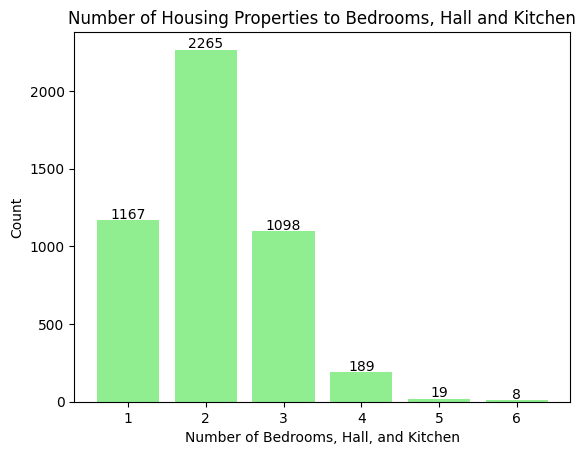

In [107]:
# bhk
bhk_counts = df['BHK'].value_counts().sort_index()
x_positions = range(len(bhk_counts))
plt.bar(x_positions, bhk_counts.values, color='lightgreen', tick_label=bhk_counts.index)

for i, value in enumerate(bhk_counts):
  plt.text(i, value+10, str(value), color='black', ha='center')

plt.xlabel('Number of Bedrooms, Hall, and Kitchen')
plt.ylabel('Count')
plt.title('Number of Housing Properties to Bedrooms, Hall and Kitchen')
plt.show()

Among the properties listed, 2 Bedrooms, Hall, and Kitchen are the most common one to find in the listing.

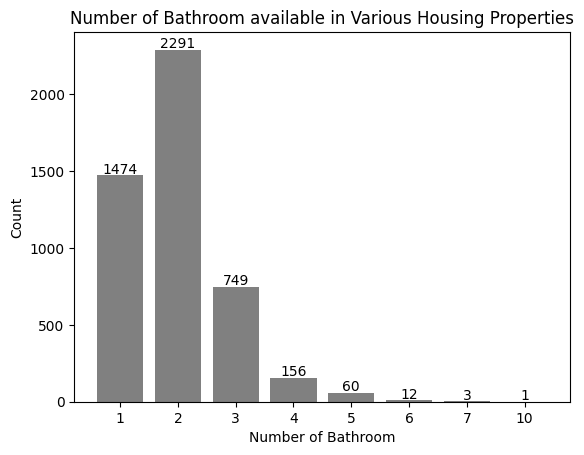

In [108]:
# bathroom
bathroom_counts = df['Bathroom'].value_counts().sort_index()
x_positions = range(len(bathroom_counts))
plt.bar(x_positions, bathroom_counts.values, color='gray', tick_label=bathroom_counts.index)

for i, value in enumerate(bathroom_counts):
  plt.text(i, value+10, str(value), color='black', ha='center')

plt.xlabel('Number of Bathroom')
plt.ylabel('Count')
plt.title('Number of Bathroom available in Various Housing Properties')
plt.show()

Most properties have the bathrooms within range 1-3, only few has more than 3 bathrooms.

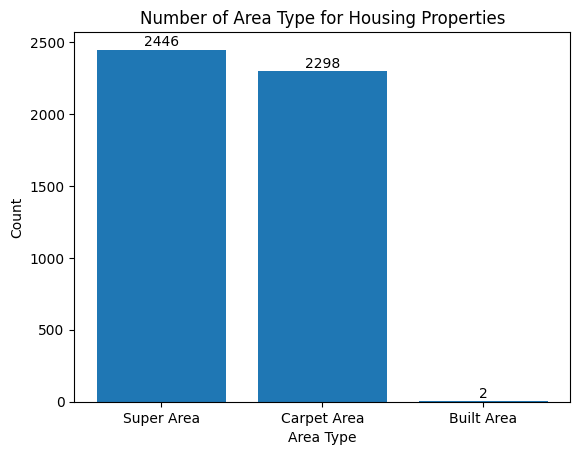

In [109]:
# area type
areaType_counts = df['Area Type'].value_counts()
plt.bar(areaType_counts.index, areaType_counts.values)

for i, value in enumerate(areaType_counts):
  plt.text(i, value+25, str(value), ha='center')

plt.xlabel('Area Type')
plt.ylabel('Count')
plt.title('Number of Area Type for Housing Properties')
plt.show()

Super Area and Carpet Area have a similar amount of listing, however for built area, it is very low compared to the other two.

In [110]:
# rata rata rent per city
print(df.groupby('City')['Rent'].mean())

City
Bangalore     9.634697
Chennai       9.645466
Delhi         9.855365
Hyderabad     9.634625
Kolkata       9.150811
Mumbai       10.937069
Name: Rent, dtype: float64


Mumbai has the highest rent average, meanwhile kolkata has the lowest average

## Check Correlation Between Rent and Other Variables

In [111]:
corr_matrix = df[numerical_columns].corr()
print(corr_matrix)

          Rent      Size
Rent  1.000000  0.556329
Size  0.556329  1.000000


In [112]:
def corr_categorical_numerical(df, categorical_columns):
    for cat_col in categorical_columns:
        unique_values = df[cat_col].nunique()
        print(cat_col)

        # Binary
        if unique_values == 2:
            corr, pval = pointbiserialr(df[cat_col], df['Rent'])
            print(f"Point-Biserial Correlation with Rent: Correlation = {corr}, p-value = {pval}\n")
        # Multi-valued
        else:
            grouped = df.groupby(cat_col)['Rent']
            anova_stat, anova_pval = f_oneway(*[group for _, group in grouped])
            print(f"ANOVA with Rent: Statistic = {anova_stat}, p-value = {anova_pval}\n")

corr_categorical_numerical(df, categorical_columns)

Posted On
ANOVA with Rent: Statistic = 8.646059044430809, p-value = 3.2170296600608902e-90

Floor
ANOVA with Rent: Statistic = 8.39236955274875, p-value = 0.0

Area Type
ANOVA with Rent: Statistic = 408.6831088459309, p-value = 1.767181984832921e-164

Area Locality
ANOVA with Rent: Statistic = 5.9011807226021205, p-value = 0.0

City
ANOVA with Rent: Statistic = 545.0541561066684, p-value = 0.0

Furnishing Status
ANOVA with Rent: Statistic = 212.73725397018575, p-value = 3.319741849328348e-89

Tenant Preferred
ANOVA with Rent: Statistic = 79.85039454286621, p-value = 7.806560998099604e-35

Point of Contact
ANOVA with Rent: Statistic = 1459.5849404124165, p-value = 0.0

BHK
ANOVA with Rent: Statistic = 588.4411119925348, p-value = 0.0

Bathroom
ANOVA with Rent: Statistic = 662.1870126886791, p-value = 0.0



Statistic shows how important a factor is to rent price. As we can see, Point of Contact has the highest statistic value, followed by Bathroom, and BHK. This shows that those 3 factors are the main reason the rent price can fluctuate.
On the other hand, size and rent are moderately correlated.

## Summary of EDA

- There are 4746 entries and 12 columns.
- The target variable is column Rent.
- There is no missing values and duplicated rows.
- There are 2 numerical columns: Rent and Size, the other columns are considered to be categorical.
- Variables (rent, size) are skewed, not normally distributed, and they have outliers. e don't remove the outliers because it may give insights.
- Among the properties listed, most properties (2251) are semi-furnished.
- Among the properties listed, most properties (3444) prefer bachelors/family as their tenant.
- Among the properties listed, most properties (2265) have 2 bedrooms.
- Among the properties listed, most properties (2291) have 2 bathrooms.
- Among the properties listed, most properties (2446) have the super area type.
- Mumbai has the highest rent average, meanwhile Kolkata has the lowest.
- Rent is strongly correlated with Point of Contact, Bathroom, BHK, City, Area Type, and Furnishing Status (ANOVA score > 212). Besides that, size and rent are moderately correlated.

# Pre-Processing

## Encoding

In [113]:
# Label encoding
label_enc = LabelEncoder()
label_col = ['City', 'Tenant Preferred', 'Point of Contact', 'Area Type']
for col in label_col:
    df[col] = label_enc.fit_transform(df[[col]])

# Ordinal encoding
furnishing_status = OrdinalEncoder(categories=[['Unfurnished', 'Semi-Furnished', 'Furnished']])
#bathroom = OrdinalEncoder(categories=[['2', '1', '3', '5', '4', '6', '7', '10']])
bathroom = OrdinalEncoder(categories=[[str(i) for i in sorted([2, 1, 3, 5, 4, 6, 7, 10])]])
df['Furnishing Status'] = furnishing_status.fit_transform(df[['Furnishing Status']])
df['Bathroom'] = bathroom.fit_transform(df[['Bathroom']])

c:\Users\User\OneDrive - Bina Nusantara\Documents\Codings\Python\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [114]:
# encode column 'Floor'
for i in range(len(df['Floor'])):
  #print(i)
  #print(df['Floor'][i].split(' ')[0])

  if df['Floor'][i].split(' ')[0] == "Ground" or df['Floor'][i].split(' ')[0] == "Lower":
    df['Floor'][i] = 0
  elif df['Floor'][i].split(' ')[0] == "Upper":
    df['Floor'][i] = int(df['Floor'][i].split(' ')[-1])
  else:
    df['Floor'][i] = int(df['Floor'][i].split(' ')[0])

c:\Users\User\OneDrive - Bina Nusantara\Documents\Codings\Python\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\Users\User\OneDrive - Bina Nusantara\Documents\Codings\Python\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
c:\Users\User\OneDrive - Bina Nusantara\Documents\Codings\Python\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

In [115]:
# typecast variable floor
df['Floor'] = df['Floor'].astype(int)

Separating the values of Floor data, for example 'Ground Floor from 2 Levels' to Ground which will be converted to 0. Because usually, floor level will affect rent price. And in order to make the data usable, it's necessary to convert it and make sure the data is integer or numerical value as well.

## Split the dataset into training and test data

In [116]:
# define the x and y
x = df[df.columns.drop(["Posted On", "Area Locality", "Rent"])]
y = df["Rent"]

In [117]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Scaling

From the shapiro test result done prior, we can conclude that the data isn’t distributed normally and some of the columns have outliers
as well. Therefore, robust scaler method will be applied to this dataset

In [118]:
scaler = RobustScaler()

x_train['Size'] = scaler.fit_transform(x_train[['Size']])
x_test['Size'] = scaler.transform(x_test[['Size']])

# Modelling

## Proposed Model: Random Forest Regressor

How Random Forest Work

**Bootstrap Sampling**\
First, multiple subsets of the original data are created by sampling with replacement (bootstrap samples).
Then, each subset is used to train a different decision tree.

**Building Decision Trees**\
Each tree is independently trained. At each node, only a random subset of features is considered to determine the best split.
The tree is grown without pruning. It can be grown fully or until a stopping criterion (ex: maximum depth) is reached.

**Aggregation of Predictions**\
In this case (regression), each tree predicts a numerical value. The final prediction is the average of all tree predictions.

Reasons for Choosing This Model
- One of the most used and flexible model
- Reduces overfitting because the final prediction is the average of all trees prediction.
- It's ability to capture non-linear pattern that often involved in house rent prediction
- Handles nonlinearity well because each tree can model complex relationships between features and the target.
- Resilient to noisy data and outliers which this dataset has.

In [119]:
# Create the model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42)

rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

# Evaluate the model
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_mae = mean_absolute_error(y_test, y_pred_rf)

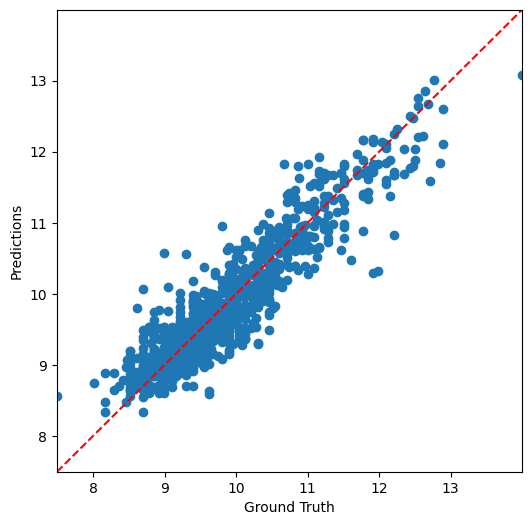

In [120]:
plt.figure(figsize=(6,6))
plt.subplot(1, 1, 1)
plt.scatter(y_test,y_pred_rf)
plt.axline( (0,0),slope=1,linestyle='--',color='red')
plt.ylim(y_test.min(),y_test.max())
plt.xlim(y_test.min(),y_test.max())
plt.xlabel("Ground Truth")
plt.ylabel("Predictions")
plt.show()

The graph above compares the predicted values (y axis) to the true value (x axis).
The red line represents the ideal situation where the true value is equal to the predicted value (x=y). The
 points spread is relatively narrow, which means that the model performs well overall but is not perfect. However,
some points appear farther away from the red line, indicating less accurate predictions,
 which could be caused by outliers present in the dataset.

## Feature Importance

In [121]:
# Find the importance score of each feature
feature_importance_rf = rf_model.feature_importances_
features_rf = x_train.columns
imp_rf_df = pd.DataFrame({
    'Feature' : features_rf,
    'Importance' : feature_importance_rf
})
# Sort the features based on it's importance score to the model
imp_rf_df = imp_rf_df.sort_values(by='Importance', ascending=False).reset_index().drop('index', axis=1)
print(imp_rf_df)

             Feature  Importance
0   Point of Contact    0.431955
1           Bathroom    0.227684
2               City    0.141565
3               Size    0.140503
4                BHK    0.023693
5  Furnishing Status    0.014532
6              Floor    0.013282
7   Tenant Preferred    0.004006
8          Area Type    0.002780


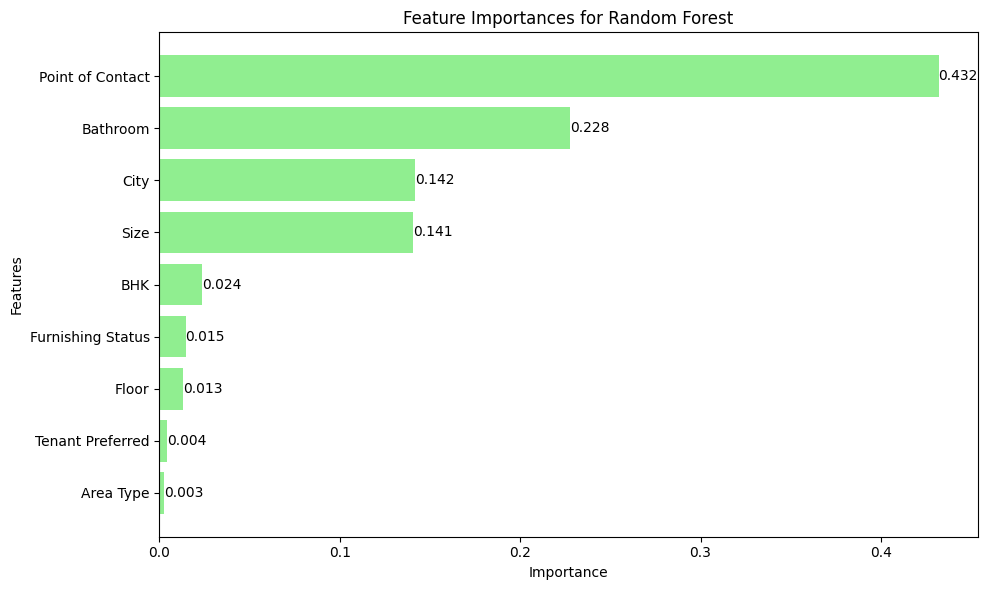

In [122]:
# Plot The Feature Importance
imp_plot = imp_rf_df.sort_values(by='Importance', ascending=True).reset_index().drop('index', axis=1)
plt.figure(figsize=(10, 6))
plt.barh(imp_plot['Feature'], imp_plot['Importance'], color='lightgreen')

for i in range(len(imp_plot)):
    plt.text(imp_plot.Importance[i], i, round(imp_plot.Importance[i], 3), va='center', ha='left', color='black')

plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances for Random Forest')
plt.tight_layout()


Top 5 features based on it's importance score using random forest are Point of Contact, Bathroom, City, Size, and BHK. There is slight different between statistic result (using ANOVA) and random forest result.

## Fine Tuning Proposed Model

In [123]:
parameters = {
    'n_estimators' : [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split':[2, 10, 15],
    'min_samples_leaf':[2, 5, 10],
    'max_features':['sqrt', 'log2']
    }

gridModel = GridSearchCV(RandomForestRegressor(), parameters)
gridModel.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 10, 15],
                         'n_estimators': [50, 100, 200, 300]})

In [124]:
y_pred_grid = gridModel.predict(x_test)

print(gridModel.best_params_)

print(gridModel.best_score_)

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
0.819894293878124


## Baseline Model: Linear Regression
Source: https://www.kaggle.com/code/sahityasetu/boosting-algorithms-for-machine-learning

Reasons for Using Linear Regression
- The goal of this dataset is to predict a continuous variable (rent).
- Linear regression models are often used as a baseline model to provide a simple and interpretable starting point.
- Used when we want to understand how the independent variables (X) impact the dependent/target variable (Y).

In [125]:
# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(x_train, y_train)

# Make predictions and evaluate
y_pred_lr = lr_model.predict(x_test)

# Evaluate the model
lr_r2 = r2_score(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_mae = mean_absolute_error(y_test, y_pred_lr)

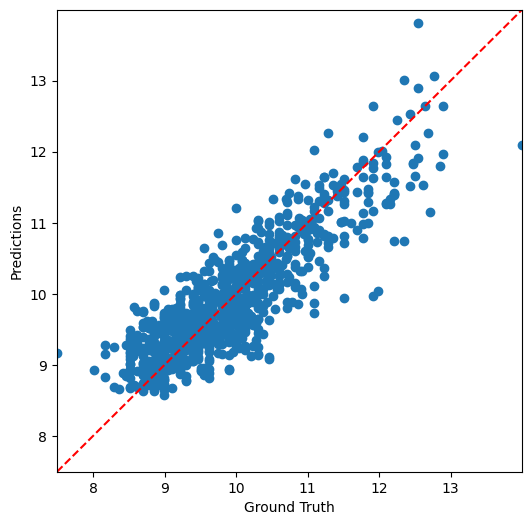

In [126]:
plt.figure(figsize=(6,6))
plt.subplot(1, 1, 1)
plt.scatter(y_test,y_pred_lr)
plt.axline( (0,0),slope=1,linestyle='--',color='red')
plt.ylim(y_test.min(),y_test.max())
plt.xlim(y_test.min(),y_test.max())
plt.xlabel("Ground Truth")
plt.ylabel("Predictions")
plt.show()

The graph above compares the predicted values (y axis) to the true value (x axis).
The red line represents the ideal situation where the true value is equal to the predicted value (x=y). The
 points spread is relatively narrow, which means that the model performs well overall but is not perfect. However,
some points appear farther away from the red line, indicating less accurate predictions,
 which could be caused by outliers present in the dataset.

## MAE, RMSE, R2 Comparison

Metrics Used to Evaluate the Models
1. R² (Coefficient of Determination): measures how well the model explains the variance in the target variable. The closer the R² score is to 1, the better the model explains the variance in the target variable.
2. RMSE (Root Mean Square Error): the square root of the average squared errors between predicted and actual values. The closer the RMSE score is to 0, the better the prediction the model makes.
3. MAE (Mean Absolute Error): measures the average absolute difference between predicted and actual values. The closer the MAE score is to 0, the better the prediction the model makes.

In [128]:
pred_models = [y_pred_lr, y_pred_rf, y_pred_grid]
results = []

for i, pm in enumerate(pred_models):
    results.append([
        np.sqrt(mean_squared_error(y_test, pm)),
        mean_absolute_error(y_test, pm),
        r2_score(y_test, pm)])

error_df = pd.DataFrame(results,
                        columns = ["RMSE", "MAE", "R2"],
                        index = ['Linear Regression', 'Random Forest', 'Random Forest after Fine Tuning'])

print(error_df)

                                     RMSE       MAE        R2
Linear Regression                0.467910  0.357758  0.746154
Random Forest                    0.372139  0.286168  0.839433
Random Forest after Fine Tuning  0.367720  0.281226  0.843224


The proposed model which is Random Forest is a better method to use compared to Baseline Model, Linear Regression. As we can see,
The proposed model offers smaller R^2, RMSE, and MAE value compared to the latter model. This means Random Forest model can capture
relationship between data and explains the variance the target variable better. It also makes smaller error in it’s prediction compared
to Linear Regression Model.

Furthermore, to increase the Accuracy of prediction, we also did some fine-tuning on our Proposed model. From the table above, it could be seen as well that after fine-tuning, the value of R^2, RSE, and MAE are increased slightly which is a good thing! Since the better the accuracy, the more usable and trusted this machine learning model would be.

# Conclusion


Our proposed model (random forest regressor) performs quite well, based on the R2, RMSE, and MAE value it's pretty accurate in predicting rent prices. Further works to this model will make the model more reliable in real-life later on.